<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
# Step 1: Check for missing values in the critical columns
print("Missing values in Employment, JobSat, and RemoteWork columns:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Step 2: Handle missing values for Employment (impute with most frequent value)
employment_mode = df['Employment'].mode()[0]  # Get most frequent value
df['Employment'].fillna(employment_mode, inplace=True)

# Step 3: Handle missing values for JobSat (impute with most frequent value)
job_sat_mode = df['JobSat'].mode()[0]  # Get most frequent value
df['JobSat'].fillna(job_sat_mode, inplace=True)

# Step 4: Handle missing values for RemoteWork (impute with most frequent value)
remote_work_mode = df['RemoteWork'].mode()[0]  # Get most frequent value
df['RemoteWork'].fillna(remote_work_mode, inplace=True)

# Step 5: Verify that missing values have been handled
print("\nMissing values after imputation:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values in Employment, JobSat, and RemoteWork columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after imputation:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_2590/2774147337.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_2590/2774147337.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_2590/394098425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_2590/394098425.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')


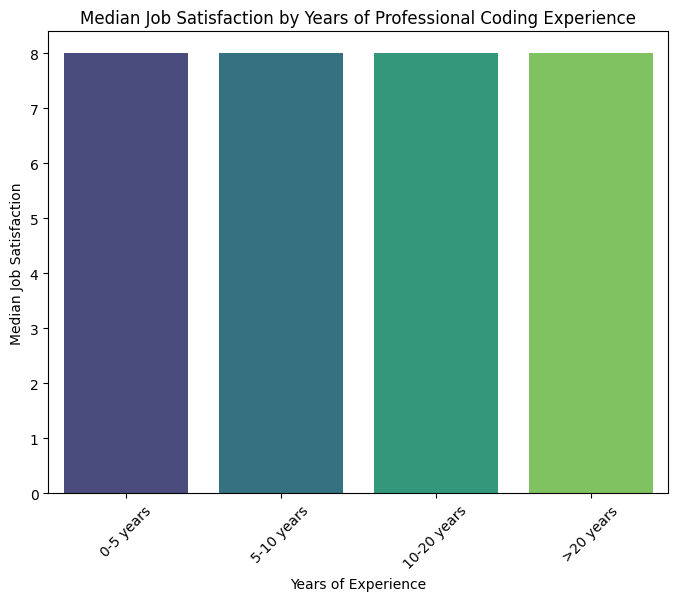

In [5]:
# Convert YearsCodePro to numeric, forcing errors to NaN (if any non-numeric values are present)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 1: Create experience ranges for YearsCodePro
bins = [0, 5, 10, 20, float('inf')]  # Define the bin edges
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']  # Define the range labels
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 2: Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Step 3: Visualize the relationship using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')

# Add labels and title
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')

# Display the plot
plt.xticks(rotation=45)
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_2590/2938375189.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='Set2')


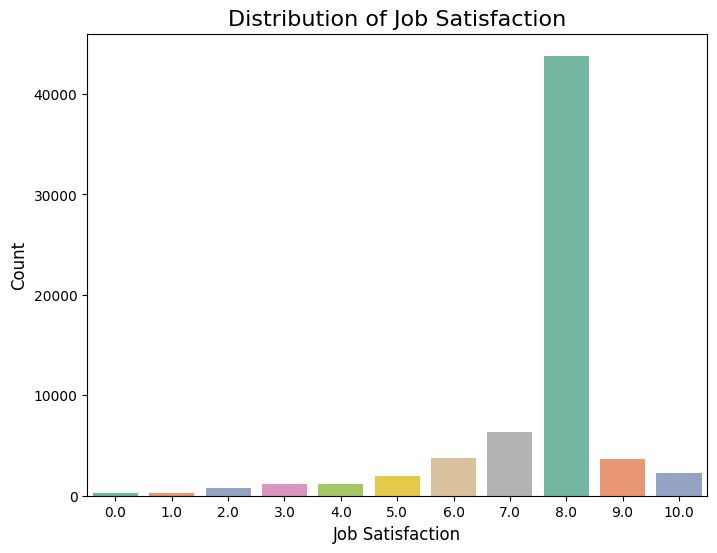

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for JobSat
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSat', data=df, palette='Set2')

# Set the title and labels
plt.title('Distribution of Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_2590/3457329277.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='Set2')


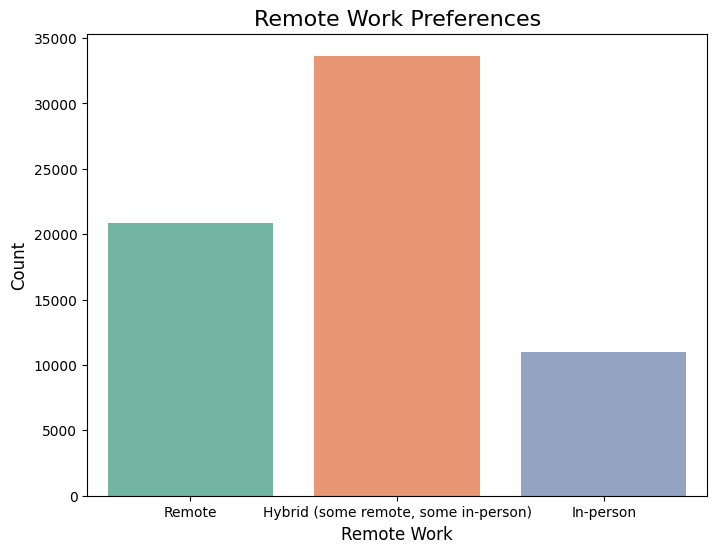

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                              

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for RemoteWork
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, palette='Set2')

# Set the title and labels
plt.title('Remote Work Preferences', fontsize=16)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

# Cross-tabulate remote work preferences by employment type
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_by_employment)

# Cross-tabulate remote work preferences by job roles
remote_by_role = pd.crosstab(df['DevType'], df['RemoteWork'])
print(remote_by_role)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


                                             Country  \
1  United Kingdom of Great Britain and Northern I...   
2  United Kingdom of Great Britain and Northern I...   
3                                             Canada   
4                                             Norway   
5                           United States of America   

                                            Language  
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...  
2                                                 C#  
3  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...  
4            C++;HTML/CSS;JavaScript;Lua;Python;Rust  
5  Bash/Shell (all shells);HTML/CSS;Java;JavaScri...  
185
23293
Country
United States of America                                10869
Germany                                                  4883
India                                                    4058
United Kingdom of Great Britain and Northern Ireland     3174
Ukraine                                                  2632
     

/tmp/ipykernel_2590/733772643.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=us_language_counts, palette='viridis')
/tmp/ipykernel_2590/733772643.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


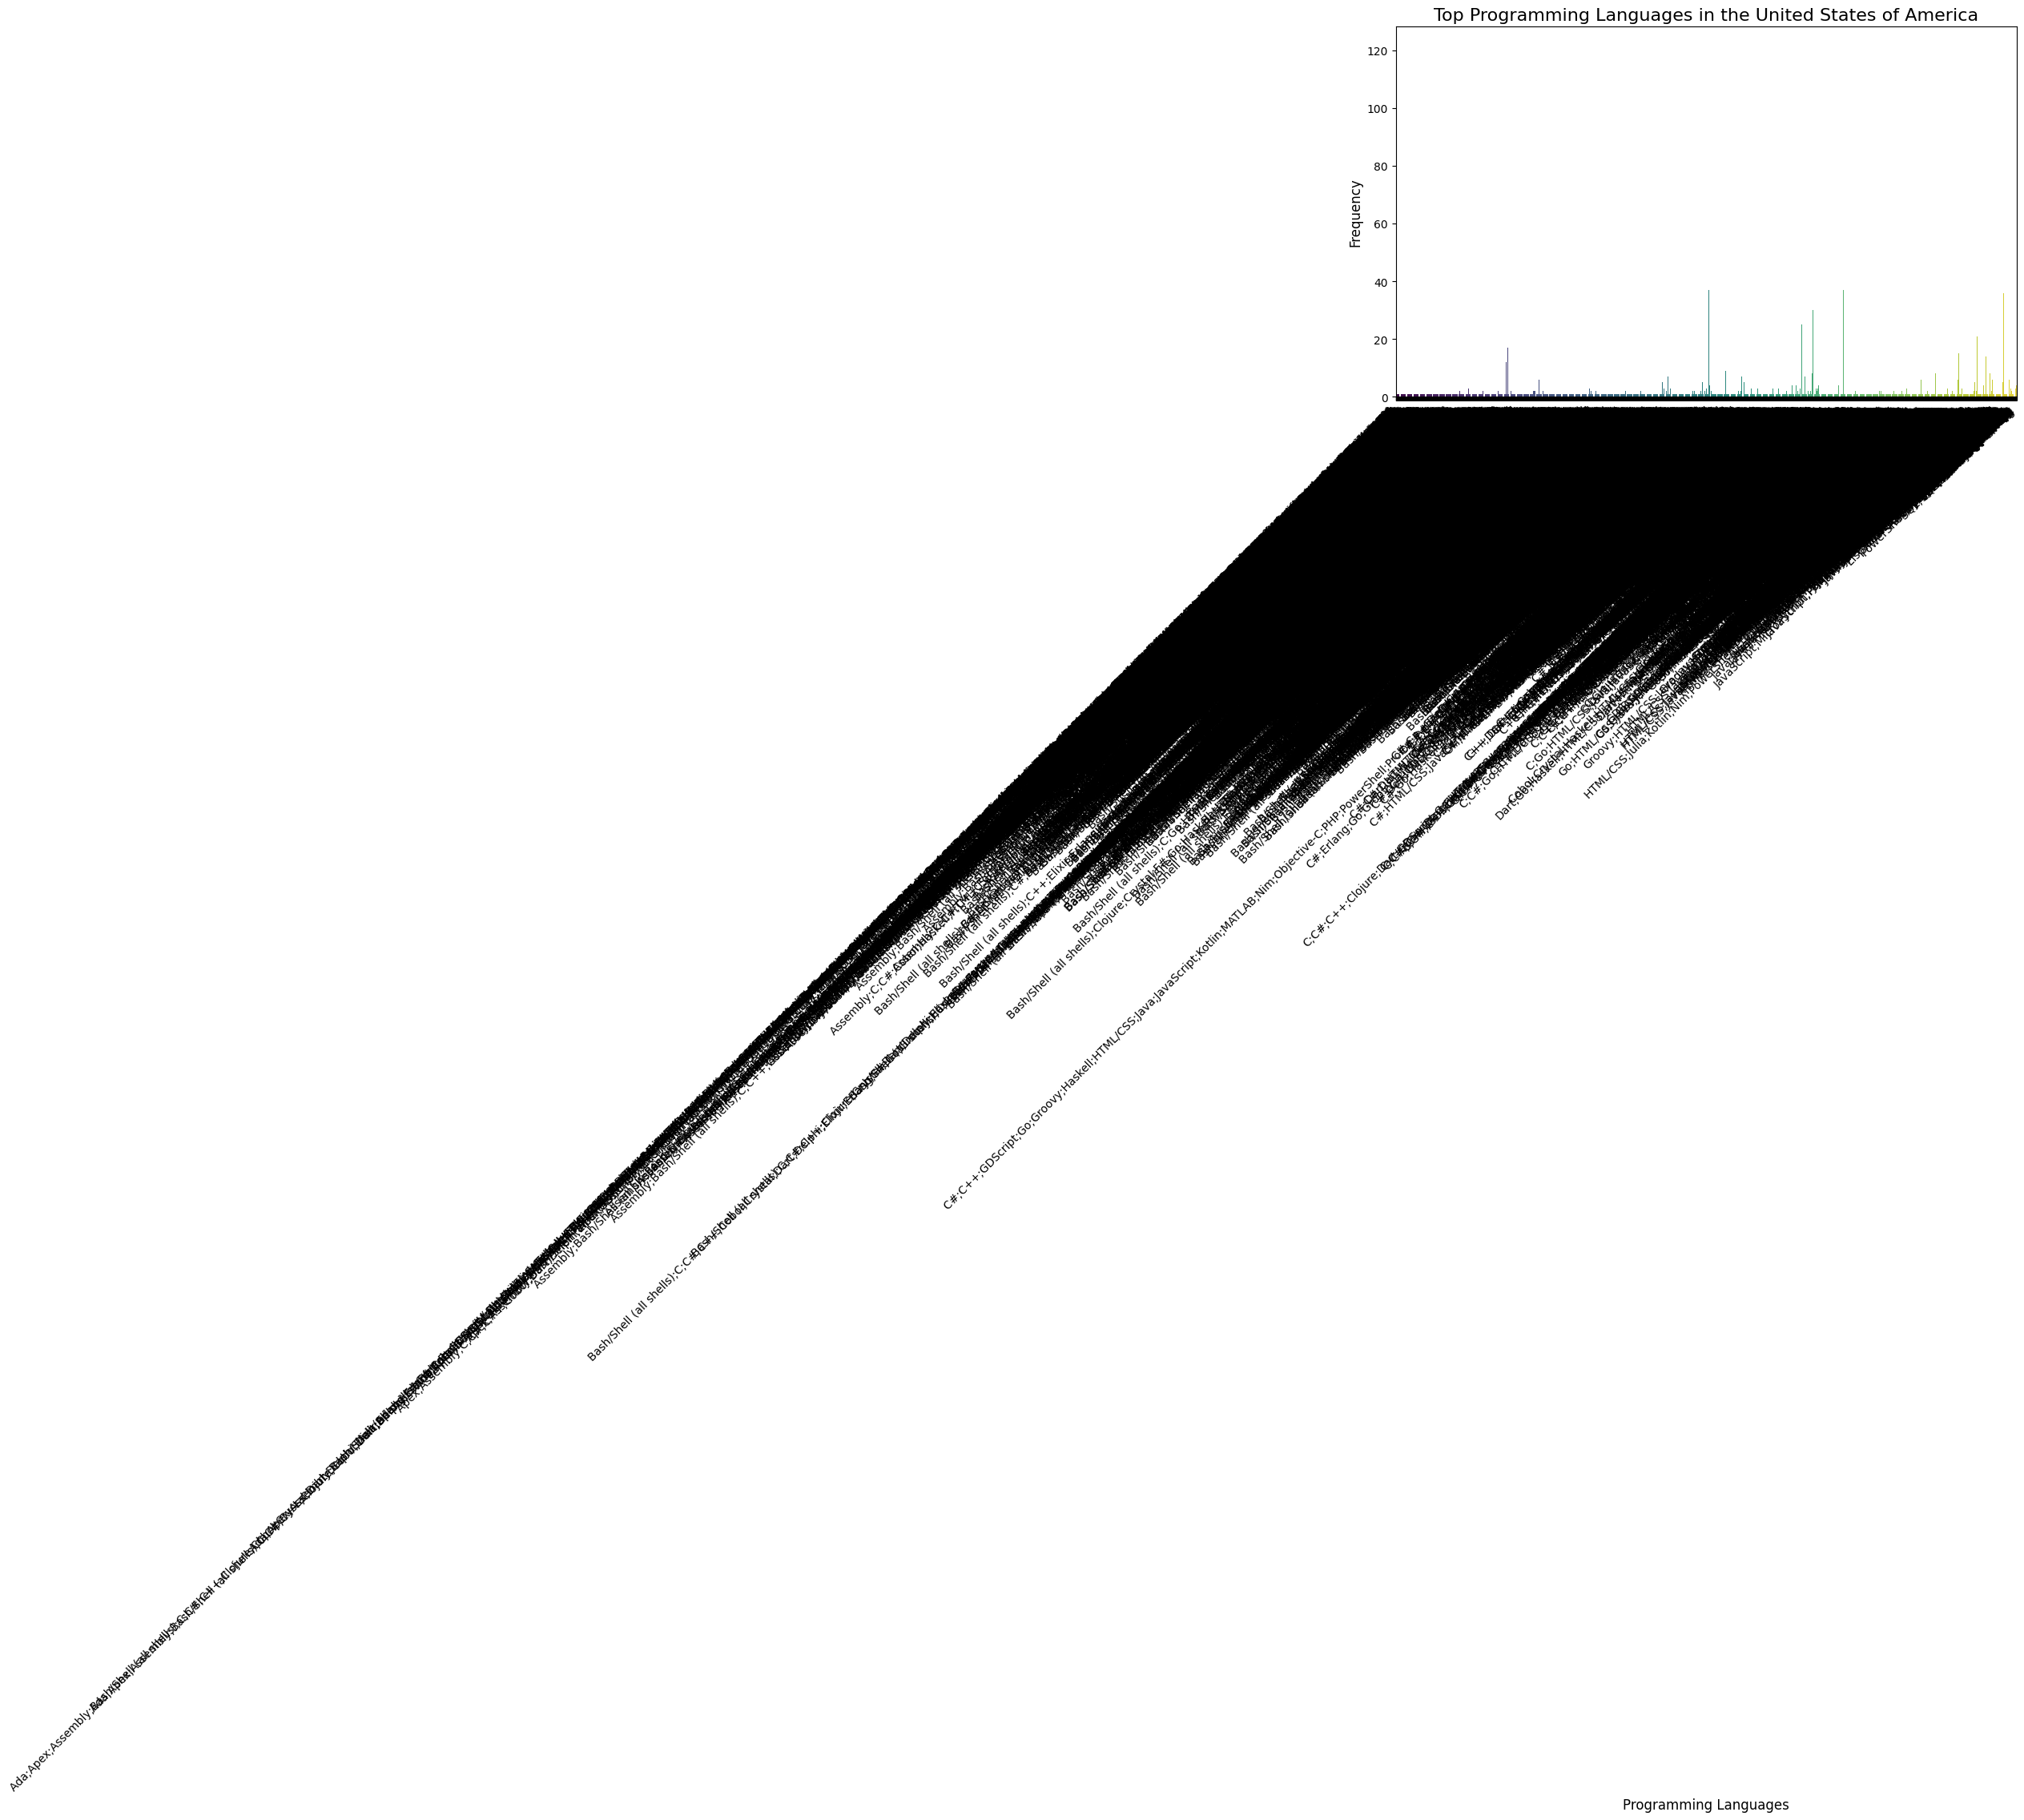

In [10]:
# Split the 'LanguageHaveWorkedWith' column by commas, then explode and strip extra spaces
languages = df['LanguageHaveWorkedWith'].str.split(',').explode().str.strip()

# Create a new DataFrame with 'Country' and the exploded language data
languages_by_country = df[['Country']].join(languages)

# Drop any rows where 'LanguageHaveWorkedWith' is NaN
languages_by_country = languages_by_country.dropna()

# Now, rename the exploded language column for clarity
languages_by_country.rename(columns={languages_by_country.columns[1]: 'Language'}, inplace=True)

# Display the first few rows to check the result
languages_by_country.head()
# Count the frequency of each language by country
language_counts_by_country = languages_by_country.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Display the first few rows of the result
language_counts_by_country.head()
# Check the exploded data
print(languages_by_country.head())
# Check if the 'Country' and 'Language' columns have valid non-null entries
print(languages_by_country['Country'].nunique())  # Number of unique countries
print(languages_by_country['Language'].nunique())  # Number of unique languages
print(languages_by_country['Country'].value_counts())  # Count of languages per country
# Example: Filter for a specific country, e.g., 'United States'
us_language_counts = language_counts_by_country[language_counts_by_country['Country'] == 'United States of America']

# Check if the filtered data is not empty
if not us_language_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Language', y='Count', data=us_language_counts, palette='viridis')

    # Set the title and labels
    plt.title('Top Programming Languages in the United States of America', fontsize=16)
    plt.xlabel('Programming Languages', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified country.")

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


YearsCodePro      float64
JobSatPoints_1    float64
dtype: object


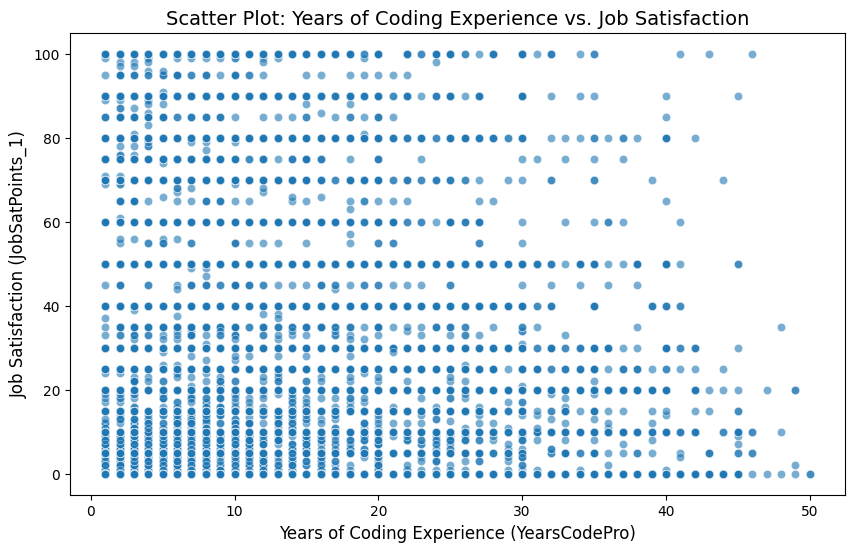

Correlation coefficient between YearsCodePro and JobSatPoints_1: -0.03284640929635475


In [11]:
# Check data types of the columns to ensure they are numeric
print(df[['YearsCodePro', 'JobSatPoints_1']].dtypes)

# If any of them are not numeric, convert them to numeric using pd.to_numeric()
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show the relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, alpha=0.6)

# Add title and labels
plt.title('Scatter Plot: Years of Coding Experience vs. Job Satisfaction', fontsize=14)
plt.xlabel('Years of Coding Experience (YearsCodePro)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_1)', fontsize=12)

# Show plot
plt.show()

# Calculate the Pearson correlation coefficient between YearsCodePro and JobSatPoints_1
correlation = df[['YearsCodePro', 'JobSatPoints_1']].corr().iloc[0, 1]
print(f"Correlation coefficient between YearsCodePro and JobSatPoints_1: {correlation}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   
Total                                                             36525   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                        

/tmp/ipykernel_2590/3675493730.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

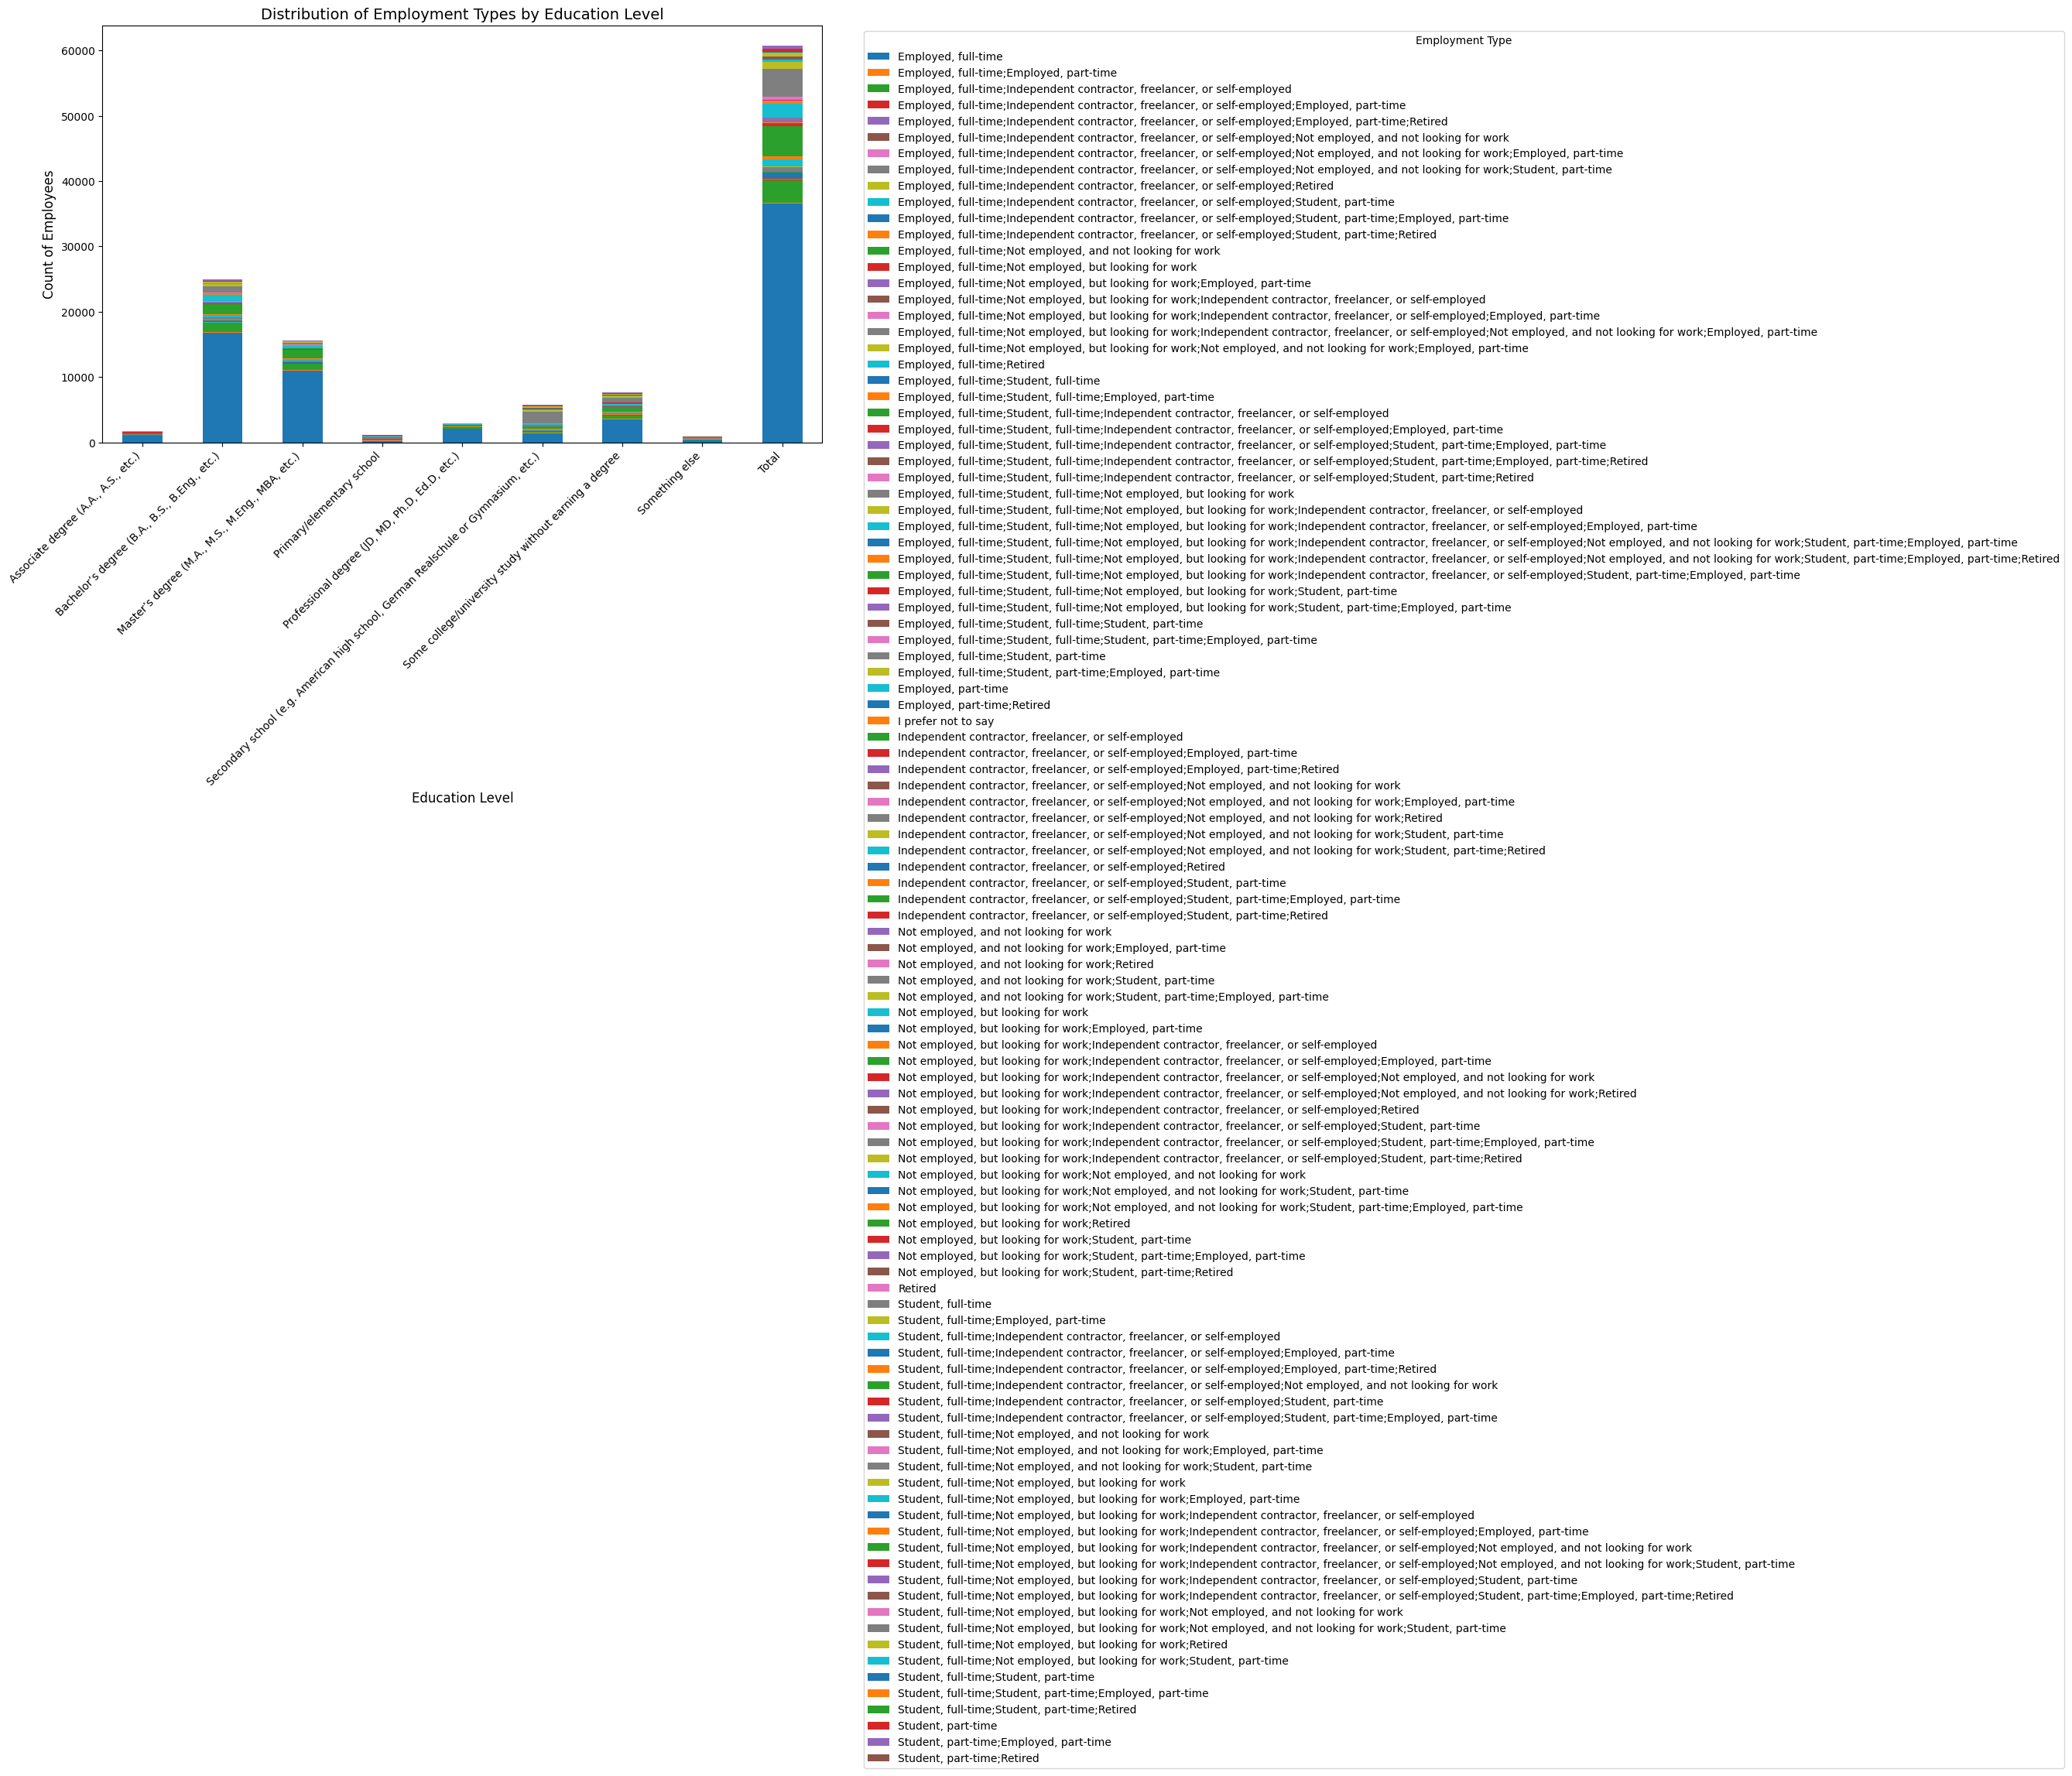

In [13]:
#Create a cross-tabulation between EdLevel and Employment
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")
print(education_employment_crosstab)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a stacked bar plot to visualize the distribution of employment types for each education level
plt.figure(figsize=(12, 6))
education_employment_crosstab.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 7))

# Set plot labels and title
plt.title('Distribution of Employment Types by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
# Save the modified dataframe to a CSV file
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
